<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [20]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [7]:
# Read CSV
data = pd.read_csv("./../data/Sacramento_transactions.csv")

In [8]:
data

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [9]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [10]:
data.head().T

,0,1,2,3,4
street,3526 HIGH ST,51 OMAHA CT,2796 BRANCH ST,2805 JANETTE WAY,6001 MCMAHON DR
city,SACRAMENTO,SACRAMENTO,SACRAMENTO,SACRAMENTO,SACRAMENTO
zip,95838,95823,95815,95815,95824
state,CA,CA,CA,CA,CA
beds,2,3,2,2,2
baths,1,1,1,1,1
sq__ft,836,1167,796,852,797
type,Residential,Residential,Residential,Residential,Residential
sale_date,Wed May 21 00:00:00 EDT 2008,Wed May 21 00:00:00 EDT 2008,Wed May 21 00:00:00 EDT 2008,Wed May 21 00:00:00 EDT 2008,Wed May 21 00:00:00 EDT 2008
price,59222,68212,68880,69307,81900


In [11]:
data.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [12]:
data.shape

(985, 12)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [14]:
# null items
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [15]:
data.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [16]:
data.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [17]:
# check the unique names of residential 'type'
data.type.unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

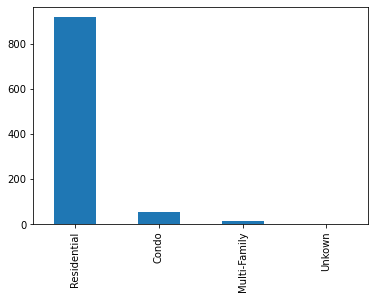

In [18]:
# Get a bar chart for residential "type"
data['type'].value_counts().plot(kind='bar');

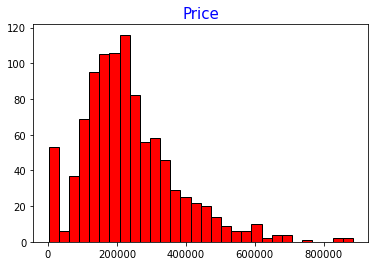

In [21]:
# Create a histogram of price and its count
n, bins, patches = plt.hist(data['price'],bins=30, color='red', edgecolor = 'black')
plt.title('Price', color = 'blue', fontsize=15)
plt.show()

In [22]:
data['city'].value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
WEST SACRAMENTO      3
RANCHO MURIETA       3
POLLOCK PINES        3
GRANITE BAY          3
LOOMIS               2
EL DORADO            2
MATHER               1
PENRYN               1
MEADOW VISTA         1
FORESTHILL           1
DIAMOND SPRINGS      1
SHINGLE SPRINGS      1
COOL                 1
WALNUT GROVE         1
GARDEN VALLEY        1
SLOUGHHOUSE          1
GREENWOOD            1
Name: city, dtype: int64

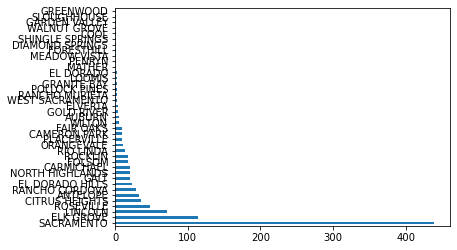

In [23]:
data['city'].value_counts().plot(kind='barh');

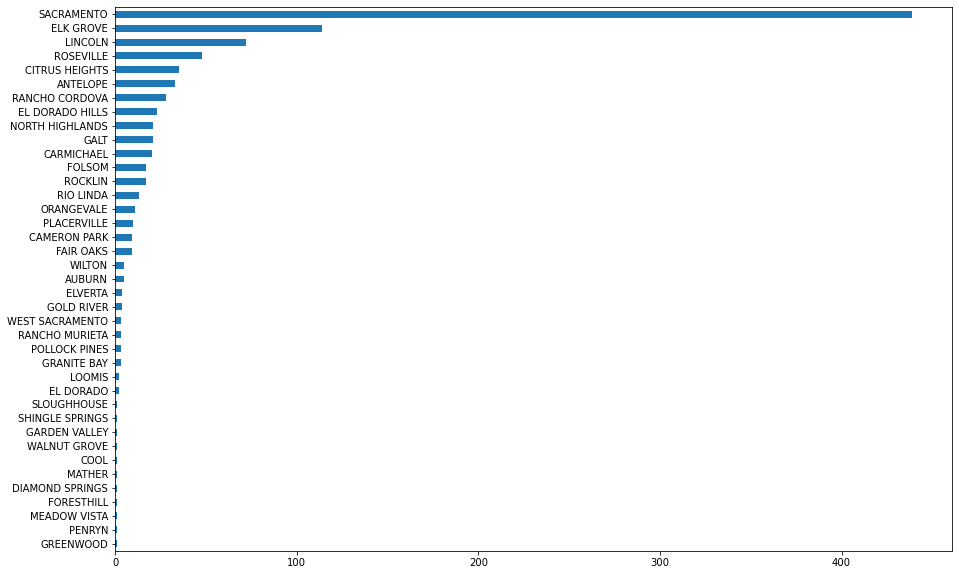

In [24]:
data['city'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));

In [25]:
data[data['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [26]:
data[data['baths'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [27]:
data[data['sq__ft'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
970,3557 SODA WAY,SACRAMENTO,95834,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,224000,38.631026,-121.501879


In [28]:
data_cleaned = data[data['sq__ft'] != 0] 

In [29]:
data_cleaned.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,814.0000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,95761.4914,3.244472,1.960688,1591.146192,229448.369779,38.577044,-121.378687
std,85.3440,0.852137,0.669804,663.841930,119825.576060,0.126315,0.119736
min,95603.0000,1.000000,1.000000,484.000000,2000.000000,38.241514,-121.550527
25%,95670.0000,3.000000,2.000000,1144.000000,148750.000000,38.473885,-121.451501
50%,95820.0000,3.000000,2.000000,1418.500000,207986.500000,38.591720,-121.405456
75%,95828.0000,4.000000,2.000000,1851.000000,284973.250000,38.674704,-121.325844
max,95864.0000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


In [30]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     814 non-null    object 
 1   city       814 non-null    object 
 2   zip        814 non-null    int64  
 3   state      814 non-null    object 
 4   beds       814 non-null    int64  
 5   baths      814 non-null    int64  
 6   sq__ft     814 non-null    int64  
 7   type       814 non-null    object 
 8   sale_date  814 non-null    object 
 9   price      814 non-null    int64  
 10  latitude   814 non-null    float64
 11  longitude  814 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


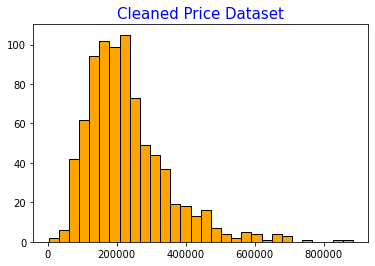

In [31]:
# create a histogram of price for CLEANED dataset
n, bins, patches = plt.hist(data_cleaned['price'],bins=30, color='orange', edgecolor = 'black')
plt.title('Cleaned Price Dataset', color = 'blue', fontsize=15)

plt.show()

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [0]:
# ANSWER
# Target variable is price. 
# Price is the the highest indicator for buying a property.

#### 2.2 List all possible variables which might be Predictor variable.

In [0]:
# ANSWER

## beds
## baths
## sq__ft
## type

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [33]:
# ANSWER
data_cleaned.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,-0.072673,-0.103332,-0.101560,-0.219591,-0.134134,-0.562983
beds,-0.072673,1.000000,0.654746,0.695710,0.441988,-0.107440,0.056713
baths,-0.103332,0.654746,1.000000,0.724631,0.501820,-0.081249,0.108081
sq__ft,-0.101560,0.695710,0.724631,1.000000,0.693708,-0.103287,0.135809
price,-0.219591,0.441988,0.501820,0.693708,1.000000,0.058475,0.278312
latitude,-0.134134,-0.107440,-0.081249,-0.103287,0.058475,1.000000,0.344431
longitude,-0.562983,0.056713,0.108081,0.135809,0.278312,0.344431,1.000000


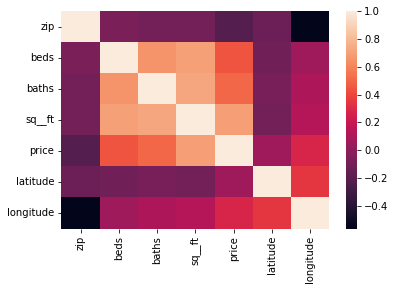

In [34]:
sns.heatmap(data_cleaned.corr());

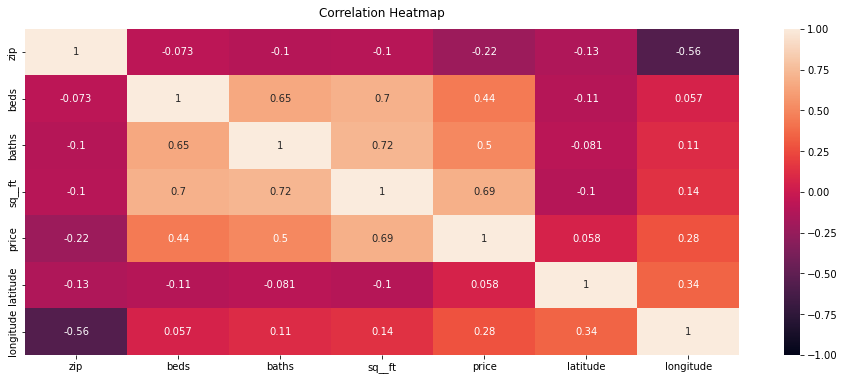

In [35]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data_cleaned.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

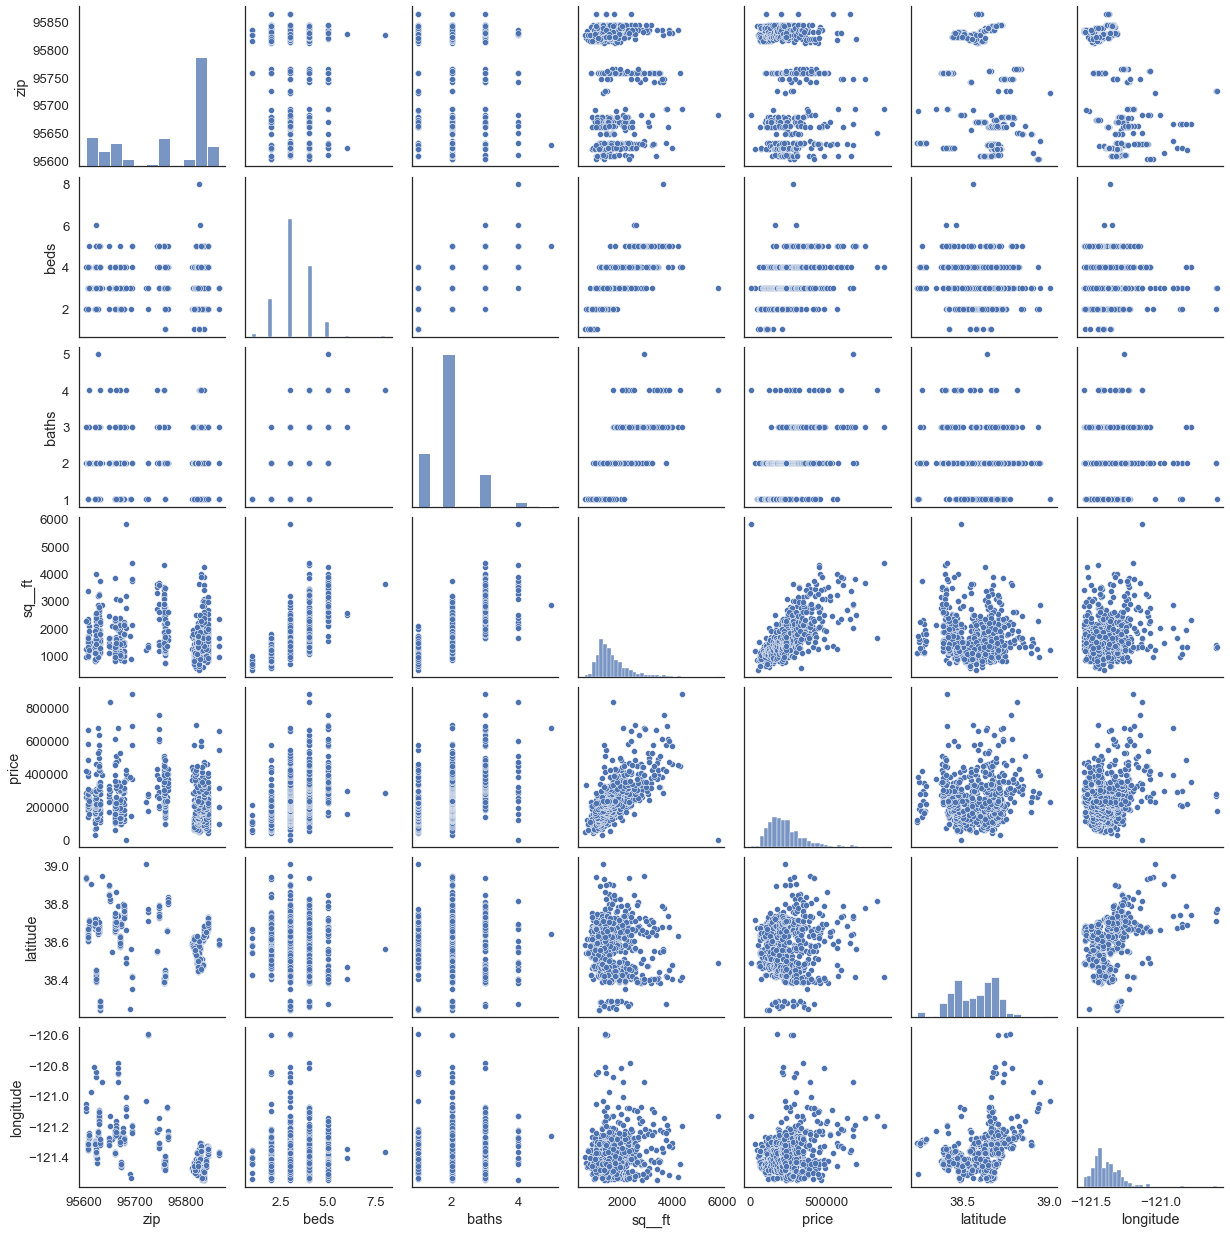

In [36]:
# create pairwise plot of dataset
sns.set(font_scale=1.2, style="white")
sns.pairplot(data_cleaned)
plt.show()

/var/folders/vp/k70yvwj57vd00y1yn6zl3mkr0000gn/T/ipykernel_3976/541851429.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data_cleaned.corr(), dtype=np.bool))


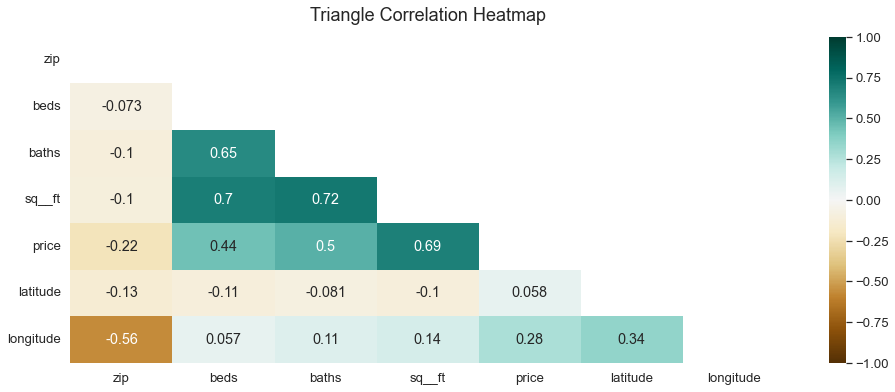

In [37]:
# Create a Triangle Correlation Heatmap
plt.figure(figsize=(16, 6))
# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_cleaned.corr(), dtype=np.bool))
heatmap = sns.heatmap(data_cleaned.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [38]:
# Check the correlation of all other numerical columns with the price column 
data_cleaned.corr()['price'].sort_values()

zip         -0.219591
latitude     0.058475
longitude    0.278312
beds         0.441988
baths        0.501820
sq__ft       0.693708
price        1.000000
Name: price, dtype: float64

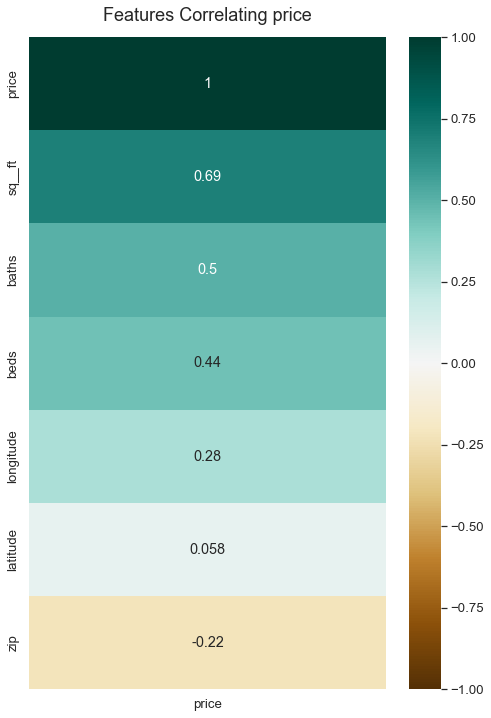

In [39]:
# Display the correlation of price column relative to other numerical columns
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data_cleaned.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating price', fontdict={'fontsize':18}, pad=16);

In [ ]:
### sq_ft is the best predictor. You cannot take the highest correlation of price v. price
# as it is the target variable we are predicting
### sq__ft has also shown stong relationship with beds, baths column

/Users/reediredale/opt/anaconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


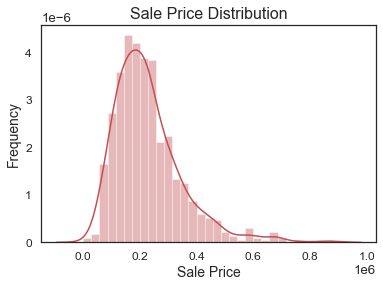

In [40]:
# code copied from some website, not really showing anything useful and is a deprecated function. 
# Adapt other code pls.
sns.distplot(data_cleaned['price'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

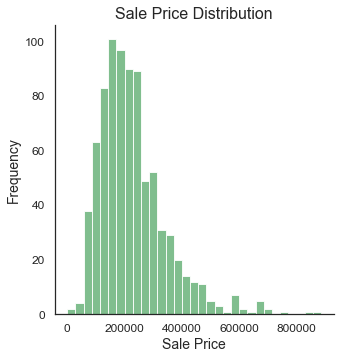

In [41]:
sns.displot(data_cleaned['price'], color = 'g')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

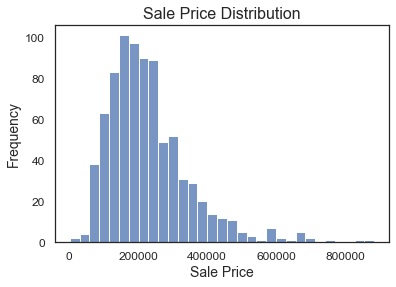

In [42]:
sns.histplot(data_cleaned['price'], color = 'b')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [43]:
## Use 'Mean' of Price to predict the possible price of a house.  (Easy but not the best)
data_cleaned['y_hat'] = data_cleaned['price'].mean()

/var/folders/vp/k70yvwj57vd00y1yn6zl3mkr0000gn/T/ipykernel_3976/3545570350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['y_hat'] = data_cleaned['price'].mean()


In [44]:
X = data_cleaned['sq__ft']
Y = data_cleaned['price']
Yhat = data_cleaned['y_hat']

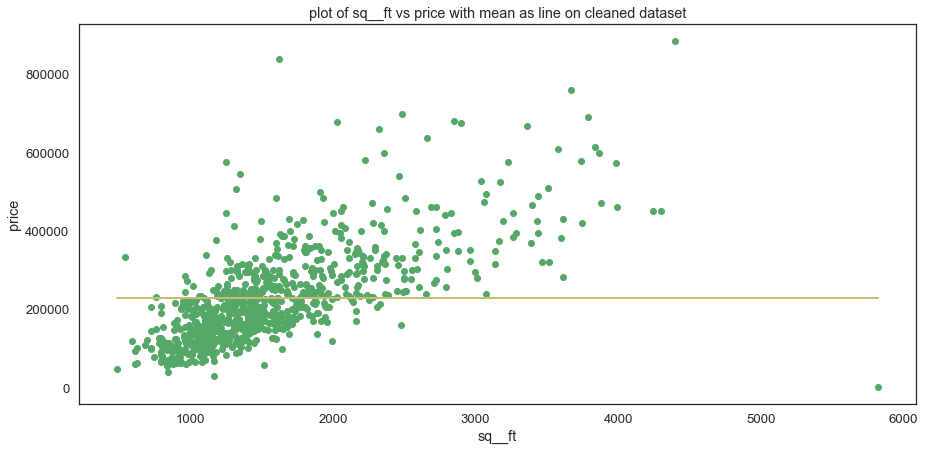

In [45]:
fig = plt.figure(figsize=(15,7))

plt.gca().scatter(X, Y, c='g')
plt.gca().plot(X, Yhat, color='y')
plt.title('plot of sq__ft vs price with mean as line on cleaned dataset')
plt.xlabel('sq__ft')
plt.ylabel('price')
plt.show()

In [46]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


X = data_cleaned[['sq__ft']]
y = data_cleaned['price']
# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error(MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination / R2 score is: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [126.04347313]
Mean squared error(MSE): 1810338664.41
Coefficient of determination / R2 score is: -48.45


In [47]:
X = data_cleaned[['sq__ft']]
y = data_cleaned['price']

In [48]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

print(linreg.coef_, linreg.intercept_)

[125.21648668] 30210.633866919146


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
print(regressor.intercept_)

27828.348831439012


In [52]:
print(regressor.coef_)

[126.38777833]


In [53]:
y_pred = regressor.predict(X_test)

In [54]:
from sklearn import metrics
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error(MAE): 60490.22271841386
Mean Squared Error(MSE): 6556861173.0476885
Root Mean Squared Error(RMSE): 80974.4476550948


In [59]:
import statsmodels.api as sm
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              6377.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):                        0.00
Time:                        10:01:45   Log-Likelihood:                         -10413.
No. Observations:                 814   AIC:                                  2.083e+04
Df Residuals:                     813   BIC:                                  2.083e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sq__ft       141.3912      1.771     79.855      0.000     137.916     144.867
==============================================================================
Omnibus:                      194.607   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6810.933
Skew:                           0.271   Prob(JB):                         0.00
Kurtosis:                      17.161   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
X = data_cleaned[['sq__ft']] # the independent variable is one feature only as this is a linear regression!
y = data_cleaned['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.516431993624119

<function matplotlib.pyplot.show(close=None, block=None)>

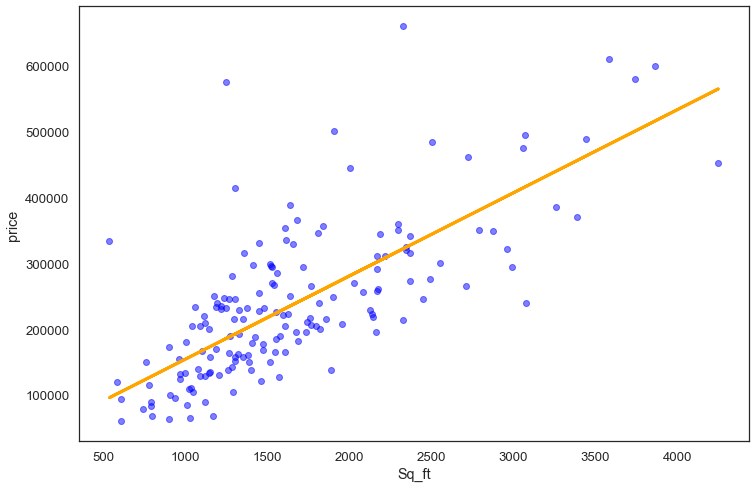

In [61]:
# import library
import matplotlib.pyplot as plt

# set figure size specifications
plt.figure(figsize=(12,8))

# plot graph
plt.scatter(X_test, y_test, color='blue', alpha=0.5)
plt.plot(X_test, y_pred, color='orange', linewidth=3)
plt.xlabel("Sq_ft")
plt.ylabel("price " )
plt.xticks()
plt.yticks()
plt.show


In [62]:
lr_coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_})
lr_coef_df

,feature,coefficient
0,sq__ft,126.387778


#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

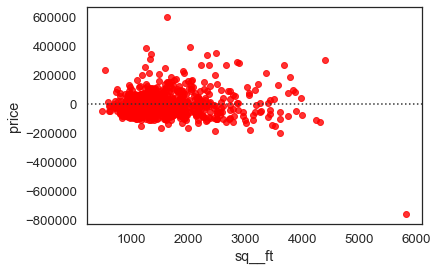

In [63]:
# ANSWER
sns.residplot(x='sq__ft', y='price', data=data_cleaned, color='red')
plt.show()

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [64]:
# ANSWER
X = data_cleaned['sq__ft']  #Predictor Variable , Independent variable
Y = data_cleaned['price']   #Target Variable , Dependent variable

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [66]:
# ANSWER
def calculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    
    beta_1 = n/d
    
    return beta_1

In [67]:
beta_1 = calculate_beta_1(X, Y)
beta_1

125.21648667984462

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [68]:
# ANSWER
def calculate_beta_0(X, Y):
    
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta_0 = Ybar - calculate_beta_1(X, Y) * Xbar
    
    return beta_0

In [69]:
beta_0 = calculate_beta_0(X, Y)

In [71]:
beta_0


30210.633866918943

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [72]:
# ANSWER
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x

In [73]:
Yhat = calculate_yhat(X, beta_0, beta_1)
Yhat

0      134891.616731
1      176338.273822
2      129882.957264
3      136895.080518
4      130008.173751
           ...      
980    315704.223497
981    215155.384693
982    182473.881670
983    241200.413922
984    200755.488725
Name: sq__ft, Length: 814, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [74]:
# ANSWER
def calculate_residual(Y, Yhat):
    res = Y - Yhat
    return res

In [75]:
resi = calculate_residual(Y, Yhat)
abs(resi)

0       75669.616731
1      108126.273822
2       61002.957264
3       67588.080518
4       48108.173751
           ...      
980     83279.223497
981     18844.615307
982     52526.118330
983      5899.413922
984     34982.511275
Length: 814, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [77]:
# ANSWER

# create function to calculate total sum of squares
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot


In [78]:
#  create function to calculate residual sum of squares
def calculate_residual_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

In [79]:
# create function to calculate R^2
def calculate_r_square(Y, Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_square(Y, Yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [80]:
calculate_total_sum_of_square(Y)
print('The total sum of squares is =',calculate_total_sum_of_square(Y) )

The total sum of squares is = 11673191135321.695


In [81]:
calculate_residual_sum_of_square(Y, Yhat)
print('The residual sum of squares is =',calculate_total_sum_of_square(Y) )

The residual sum of squares is = 11673191135321.695


In [82]:
# to calculate R^2 = Rsquare value
print('The R^2 Score is =',calculate_total_sum_of_square(Y) )
calculate_r_square(Y, Yhat)

The R^2 Score is = 11673191135321.695


0.4812307133326901

##### 2.7.F [BONUS] Draw Plot of Predicted Line

<AxesSubplot:xlabel='sq__ft', ylabel='price'>

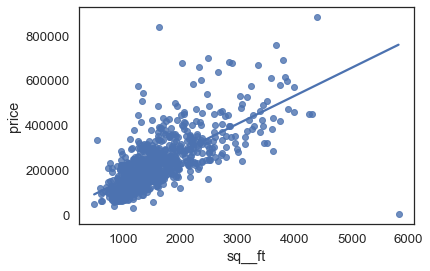

In [84]:
# use regplot method in seaborn library

sns.regplot(x = "sq__ft",
            y = "price", 
            ci = None,
            data = data_cleaned)

In [0]:
# ANSWER

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

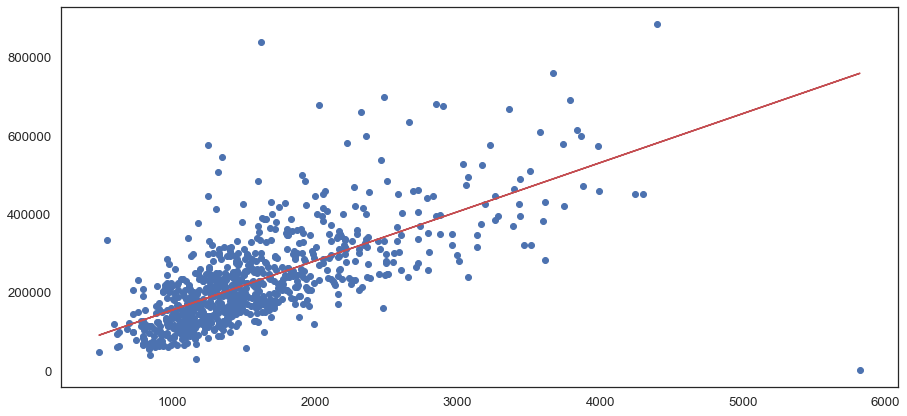

In [85]:
# ANSWER
def draw_plot(X, Y, Yhat):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');

    plt.show();
    
    
draw_plot(X, Y, Yhat)

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [86]:
# ANSWER
xpred = 1204
xpred

1204

In [87]:
beta_0

30210.633866918943

In [88]:
beta_1

125.21648667984462

In [91]:
Ypred = beta_1 * 1204 + beta_0
Ypred

180971.28382945186

In [92]:
Ypred = beta_1 * xpred + beta_0
Ypred
print("The predicted price of this house is = US$", Ypred)

The predicted price of this house is = US$ 180971.28382945186




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



